In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
images_dest = '/content/PRPM/'


if not os.path.isdir(images_dest):
    os.makedirs(images_dest)

In [ ]:
%cd /content/drive/MyDrive/MTech \AI \NUS/PRACTICE \MODULE/

/content/drive/MyDrive/MTech AI NUS/PRACTICE MODULE


In [ ]:
!ls

 0ace9ea7880444b799a6c5e2d0154147.jpeg
'Copy of Untitled0.ipynb'
 final_clean_orig.zip
 mini_resnet_13.png
 mini_resnet_17.png
 mini_resnet_18.png
 mini_resnet_19.png
 mini_resnet.png
 PracticeProject
'Residual Neural Network Training Notebook.ipynb'
 resnetModel10.h5
 resnetModel11.h5
 resnetModel12.h5
 resnetModel13.h5
 resnetModel14.h5
 resnetModel15.h5
 resnetModel16.csv
 resnetModel16.h5
 resnetModel17.csv
 resnetModel17.h5
 resnetModel18.csv
 resnetModel18.h5
 resnetModel19.csv
 resnetModel19.h5
 resnetModel20.csv
 resnetModel20.h5
 resnetModel21.csv
 resnetModel21.h5
 resnetModel22.csv
 resnetModel22.h5
 resnetModel8.h5
 resnetModel9.h5
 resnetModel.h5
'Resnet Model Inferance.ipynb'
 templates
'Test Images'
 Untitled


In [ ]:
!unzip final_clean_orig.zip -d /content/PRPM/

Streaming output truncated to the last 5000 lines.
  inflating: /content/PRPM/final_clean_orig/non recyclables/oxo_degradable_bag229.jpeg  
  inflating: /content/PRPM/final_clean_orig/non recyclables/oxo_degradable_bag230.jpeg  
  inflating: /content/PRPM/final_clean_orig/non recyclables/oxo_degradable_bag232.jpeg  
  inflating: /content/PRPM/final_clean_orig/non recyclables/oxo_degradable_bag233.jpeg  
  inflating: /content/PRPM/final_clean_orig/non recyclables/oxo_degradable_bag236.jpeg  
  inflating: /content/PRPM/final_clean_orig/non recyclables/oxo_degradable_bag237.jpeg  
  inflating: /content/PRPM/final_clean_orig/non recyclables/oxo_degradable_bag239.jpeg  
  inflating: /content/PRPM/final_clean_orig/non recyclables/oxo_degradable_bag240.jpeg  
  inflating: /content/PRPM/final_clean_orig/non recyclables/oxo_degradable_bag241.jpeg  
  inflating: /content/PRPM/final_clean_orig/non recyclables/oxo_degradable_bag243.jpeg  
  inflating: /content/PRPM/final_clean_orig/non recyclables

In [ ]:
#installing the libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import warnings
from joblib import Parallel, delayed
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import shutil
import random
from PIL import Image

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,Input,add
from tensorflow.keras.layers import Conv2D,Add,ZeroPadding2D,AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from keras.losses import categorical_crossentropy
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
import glob
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger,LearningRateScheduler
import sklearn.metrics as metrics

In [ ]:
# Reading the dataset
def load_images(dataset_path):
    imagepaths, labels = list(), list()

    # Sort sub-folders by alphabetical order
    # List the directory
    try:
        classes = sorted(os.walk(dataset_path).next()[1])
    except Exception:  # Python 3
        classes = sorted(os.walk(dataset_path).__next__()[1])

    statistics_str=f"Images loaded form {dataset_path}:\n"
    # List each sub-directory (the classes)
    for c in classes:
        img_num = 0
        c_dir = os.path.join(dataset_path, c)
        try:  # Python 2
            walk = os.walk(c_dir).next()
        except Exception:  # Python 3
            walk = os.walk(c_dir).__next__()

        # Add each image to the training set
        for sample in walk[2]:
            # Only keeps jpg and jpeg images
                if sample.endswith('.jpg') or sample.endswith('.jpeg'):
                    imagepaths.append(os.path.join(c_dir, sample))
                    labels.append(c)
                    img_num +=1

        statistics_str += f"{c}: {img_num}\n"

    print(statistics_str)

    return pd.DataFrame({"imagepath":imagepaths, "label":labels})

In [ ]:
from pathlib import Path
import imghdr

data_dir = "/content/PRPM/final_clean_orig/"
image_extensions = [".png", ".jpg",".jpeg"]  # add there all your images file extensions
i=0
l = []
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            i=i+1
            l.append(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow ")
            i=i+1
            l.append(filepath)
print(l)
print(i)

/content/PRPM/final_clean_orig/dirty recyclables/clean_food_container_84.jpeg is not an image
/content/PRPM/final_clean_orig/dirty recyclables/dirty_disposable_cup_329.jpeg is not an image
/content/PRPM/final_clean_orig/dirty recyclables/half_empty_soft_drink_bottle_166.jpeg is not an image
/content/PRPM/final_clean_orig/dirty recyclables/dirty_disposable_cup_147.jpeg is not an image
/content/PRPM/final_clean_orig/dirty recyclables/half_empty_water_bottle_63.jpeg is not an image
/content/PRPM/final_clean_orig/dirty recyclables/dirty_plastic_cup_589.jpeg is not an image
/content/PRPM/final_clean_orig/dirty recyclables/dirty_disposable_cup_492.jpeg is not an image
/content/PRPM/final_clean_orig/dirty recyclables/dirty_disposable_cup_194.jpeg is not an image
/content/PRPM/final_clean_orig/dirty recyclables/clear_polymer_food_box_293.jpeg is not an image
/content/PRPM/final_clean_orig/dirty recyclables/dirty_plastic_takeaway_container_185.jpeg is not an image
/content/PRPM/final_clean_orig

In [ ]:
df1 = pd.DataFrame(data = l,columns = ['Toremove'])
removing = df1['Toremove'].tolist()
for i in removing:
    os.remove(i)

In [ ]:
df = load_images('/content/PRPM/final_clean_orig/')

Images loaded form /content/PRPM/final_clean_orig/:
clean recyclables: 13318
dirty recyclables: 9502
non recyclables: 15724



In [ ]:
df.head()

,imagepath,label
0,/content/PRPM/final_clean_orig/clean recyclabl...,clean recyclables
1,/content/PRPM/final_clean_orig/clean recyclabl...,clean recyclables
2,/content/PRPM/final_clean_orig/clean recyclabl...,clean recyclables
3,/content/PRPM/final_clean_orig/clean recyclabl...,clean recyclables
4,/content/PRPM/final_clean_orig/clean recyclabl...,clean recyclables


In [ ]:
def label(df):
    #print(df)
    if df == 'non recyclables':
        return 0
    elif df == 'clean recyclables':
        return 1
    else:
        return 2

In [ ]:
df['EncodedLabel'] = df['label'].apply(lambda x:label(x))

In [ ]:
df.head()

,imagepath,label,EncodedLabel
0,/content/PRPM/final_clean_orig/clean recyclabl...,clean recyclables,1
1,/content/PRPM/final_clean_orig/clean recyclabl...,clean recyclables,1
2,/content/PRPM/final_clean_orig/clean recyclabl...,clean recyclables,1
3,/content/PRPM/final_clean_orig/clean recyclabl...,clean recyclables,1
4,/content/PRPM/final_clean_orig/clean recyclabl...,clean recyclables,1


In [ ]:
df['EncodedLabel'].value_counts()

0    15724
1    13318
2     9502
Name: EncodedLabel, dtype: int64

In [ ]:
y_train = to_categorical(df['EncodedLabel'], 3)
y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
imagePath = df['imagepath']
trainPath, validPath, trainLabels, validLabels = train_test_split(imagePath, y_train, test_size = 0.2, random_state = 27, stratify=y_train)

In [ ]:
print('Total Train Dataset Size : ', trainPath.shape[0])
print('Total Valid Dataset Size : ', validPath.shape[0])

Total Train Dataset Size :  30835
Total Valid Dataset Size :  7709


In [ ]:
import tensorflow as tf
import random

In [ ]:
#REF: https://www.tensorflow.org/api_docs/python/tf/data/Dataset
#REF: https://www.tensorflow.org/tutorials/images/data_augmentation
#REF: https://www.kaggle.com/danofer/ranzcr-chexnet-starter

def build_decoder(with_labels=True, target_size=(200, 200)):
    def decode(path):
        file_bytes = tf.io.read_file(path)
        img = tf.image.decode_jpeg(file_bytes, channels=3)
        img = tf.cast(img, tf.float32) / 255.0
        img = tf.image.resize(img, target_size)

        return img

    def decode_with_labels(path, label):
        #print('LABELS : ', labels)
        return decode(path), label

    return decode_with_labels if with_labels else decode

def build_augmenter(with_labels=True):
    def augment(img):
        number = random.randint(1,5)
        seed = (1, 5)
        if number == 1:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.stateless_random_contrast(img,0.2, 0.5,seed)
            img = tf.image.central_crop(img, central_fraction=0.5)
        if number == 2:
            #img = tf.image.stateless_random_flip_up_down(img,seed)
            img = tf.image.stateless_random_contrast(img,0.1, 0.9,seed)
            img = tf.image.adjust_saturation(img, 3)
            img = tf.image.stateless_random_brightness(img, 0.2,seed)
        if number == 3:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.stateless_random_saturation(img, 0.2, 0.5,seed)
            img = tf.image.adjust_brightness(img, 0.4)
        if number == 4:
            #img = tf.image.stateless_random_flip_up_down(img,seed)
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.adjust_saturation(img, 3)
            img = tf.image.stateless_random_hue(img, 0.2,seed)
        if number == 5:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.adjust_gamma(img, 0.2)
            img = tf.image.central_crop(img, central_fraction=0.5)
        return img

    def augment_with_labels(img, label):
        return augment(img), label

    return augment_with_labels if with_labels else augment

def build_dataset(paths, labels=None, bsize=32, cache=True,
                  decode_fn=None, augment_fn=None,
                  augment=True, repeat=True, shuffle=1024,cache_dir=""):
    if cache_dir != "" and cache is True:
        os.makedirs(cache_dir, exist_ok=True)

    if decode_fn is None:
        decode_fn = build_decoder(labels is not None)

    if augment_fn is None:
        augment_fn = build_augmenter(labels is not None)

    AUTO = tf.data.experimental.AUTOTUNE
    slices = paths if labels is None else (paths, labels)

    #from_tensor_slices(tensor) creates a Dataset whose elements are slices of the given tensors.
    dset = tf.data.Dataset.from_tensor_slices(slices)
    dset = dset.map(decode_fn, num_parallel_calls=AUTO)
    dset = dset.cache(cache_dir) if cache else dset
    dset = dset.map(augment_fn, num_parallel_calls=AUTO) if augment else dset
    dset = dset.repeat() if repeat else dset
    dset = dset.shuffle(shuffle) if shuffle else dset
    dset = dset.batch(bsize).prefetch(AUTO)

    return dset

In [ ]:
#Building the decoder for building the Train and Valid Dataset:

decoder = build_decoder(with_labels=True, target_size=(200, 200))
print(decoder)

<function build_decoder.<locals>.decode_with_labels at 0x7fb9e4ca1dd0>


In [ ]:
dtrain = build_dataset(
    trainPath, trainLabels, bsize=16, decode_fn=decoder,cache_dir='/content/PRPM/PracticeProject/tf_cache'
)

dvalid = build_dataset(
    validPath, validLabels, bsize=16,
    repeat=False, shuffle=False, augment=False, decode_fn=decoder,cache_dir='/content/PRPM/PracticeProject/tf_cache'
)

In [ ]:
print('Train Dataset : ',dtrain)
print('Valid Dataset : ',dvalid)

Train Dataset :  <PrefetchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>
Valid Dataset :  <PrefetchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>


MODEL BUILDING

Creating the Convolution and Identity Block

In [ ]:
def resIdentity_blk(x, filter):
    x_skip = x

    #Layer 1
    x = Conv2D(filter, (3,3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    #Layer 2
    x = Conv2D(filter, (3,3), padding='same')(x)
    x = BatchNormalization()(x)

    #Add Layer
    x = Add()([x, x_skip])
    x = Activation('relu')(x)

    return x

def resConv_blp(x, filter):
    x_skip = x

    #Layer 1
    x = Conv2D(filter, (3,3), padding='same', strides = (2,2))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    #Layer 2
    x = Conv2D(filter, (3,3), padding='same')(x)
    x = BatchNormalization()(x)

    #Skip Layer
    x_skip = Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    #x_skip = BatchNormalization()(x_skip)

    #Add Layer
    x = Add()([x, x_skip])
    x = Activation('relu')(x)

    return x

Creating the 2 block residual architecture (Model 17)

In [ ]:
def ResidualCNN(num_classes = 3):
  input = tf.keras.Input(shape=(200, 200, 3), name='img')
  #x = ZeroPadding2D((3,3))(inputs)

  #Beginning Conv Layer with MaxPool
  x = Conv2D(16, (3,3), padding='valid', strides=(2,2))(input)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  #x = MaxPooling2D(pool_size=(3,3), strides=(2,2))(x)

  x = resConv_blp(x,16)
  x = resIdentity_blk(x,16)
  x = resIdentity_blk(x,16)

  x = resConv_blp(x,32)
  x = resIdentity_blk(x,32)
  x = resIdentity_blk(x,32)

  x= AveragePooling2D(pool_size=(8,8))(x)
  x = Flatten()(x)

  output = Dense(num_classes, activation='softmax',kernel_initializer='he_normal')(x)
  model = Model(inputs = input,outputs = output)
  return model

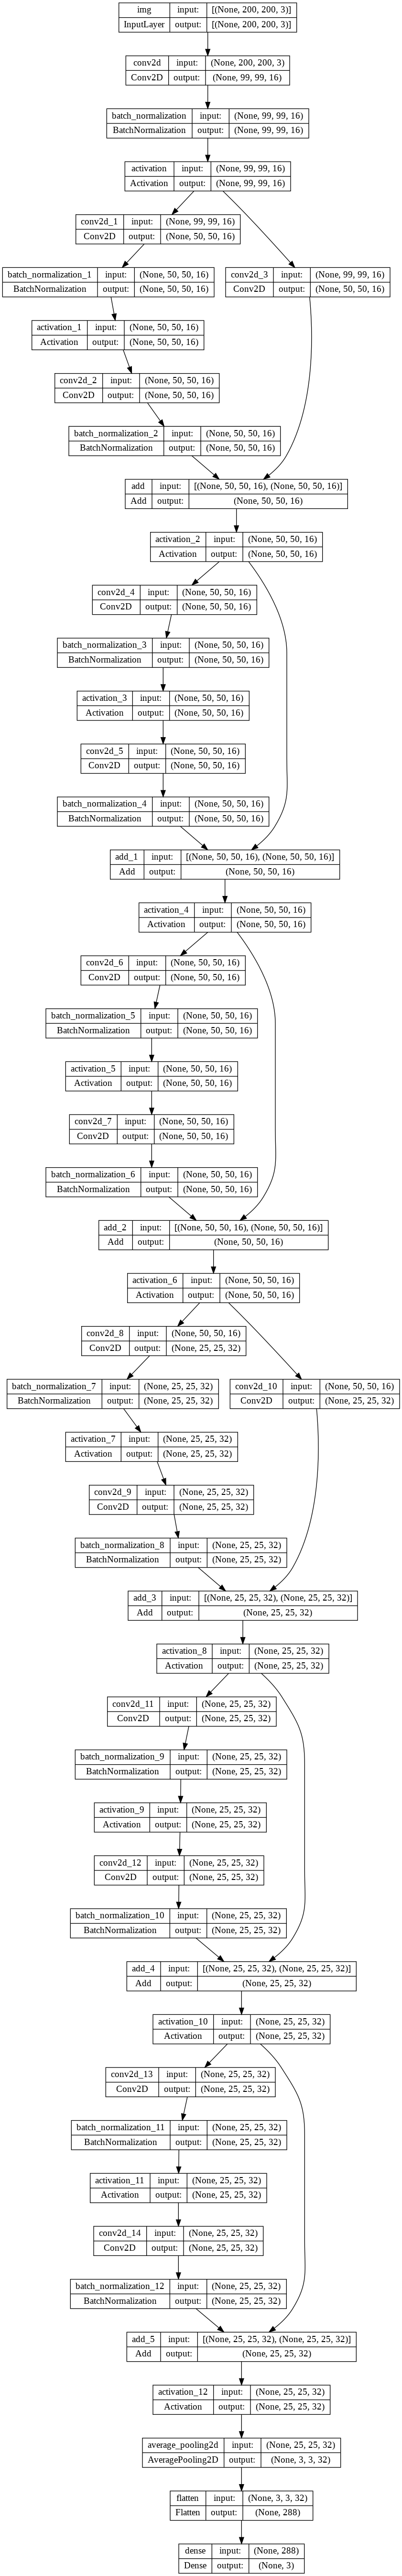

In [ ]:
model_t = ResidualCNN()
plot_model(model_t, 'mini_resnet_17.png', show_shapes=True)

In [ ]:
model_t = ResidualCNN()
model_t.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 99, 99, 16)   448         ['img[0][0]']                    
                                                                                                  
 batch_normalization (BatchNorm  (None, 99, 99, 16)  64          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
BATCH_SIZE = 32
#total number of datapoints that should be passed through the network in individual epochs. This is used when we are generating data through augmentations
weighted_steps_per_epoch = trainPath.shape[0] // BATCH_SIZE

#Callback for saving the weights
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'resnetModel20.h5', save_best_only=True, monitor='val_acc', mode='max',restore_best_weights=True)

#Callback to stop training if the metric value doesnt change for 6 epochs
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_acc', min_delta=0.0001, patience=6, mode='max',restore_best_weights=True)

csv_logger      = CSVLogger('resnetModel20.csv')

In [ ]:
def lrSchedule(epoch):
    lr  = 1e-3 #fixed

    if epoch > 45:
        lr  *= 0.5e-3
    elif epoch > 35:
        lr  *= 1e-3
    elif epoch > 25:
        lr  *= 1e-2
    elif epoch > 15:
        lr  *= 1e-1 #fixed

    print('Learning rate: ', lr)
    return lr

LRScheduler     = LearningRateScheduler(lrSchedule)

In [ ]:
#Adam optimizer
optim = tf.keras.optimizers.Adam(0.001)

In [ ]:
#Compile the model:
model_t.compile(optimizer=optim,loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
dtrain,dvalid

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>)

RESNET MODEL TRAINING

Final Model (Model 17)

In [ ]:
history = model_t.fit(
    dtrain,
    epochs=60,
    verbose=1,
    callbacks=[checkpoint,LRScheduler,early_stop,csv_logger],
    steps_per_epoch=weighted_steps_per_epoch,
    validation_data=dvalid)

Learning rate:  0.001
Epoch 1/60
963/963 [==============================] - 22s 21ms/step - loss: 1.0903 - acc: 0.4237 - val_loss: 1.1022 - val_acc: 0.4300 - lr: 0.0010
Learning rate:  0.001
Epoch 2/60
963/963 [==============================] - 20s 21ms/step - loss: 1.0428 - acc: 0.4561 - val_loss: 1.0890 - val_acc: 0.3917 - lr: 0.0010
Learning rate:  0.001
Epoch 3/60
963/963 [==============================] - 20s 21ms/step - loss: 1.0217 - acc: 0.4726 - val_loss: 1.0666 - val_acc: 0.4288 - lr: 0.0010
Learning rate:  0.001
Epoch 4/60
963/963 [==============================] - 20s 20ms/step - loss: 1.0009 - acc: 0.4994 - val_loss: 1.0551 - val_acc: 0.4327 - lr: 0.0010
Learning rate:  0.001
Epoch 5/60
963/963 [==============================] - 20s 20ms/step - loss: 0.9807 - acc: 0.5116 - val_loss: 1.0061 - val_acc: 0.4897 - lr: 0.0010
Learning rate:  0.001
Epoch 6/60
963/963 [==============================] - 19s 20ms/step - loss: 0.9538 - acc: 0.5376 - val_loss: 0.9669 - val_acc: 0.5237

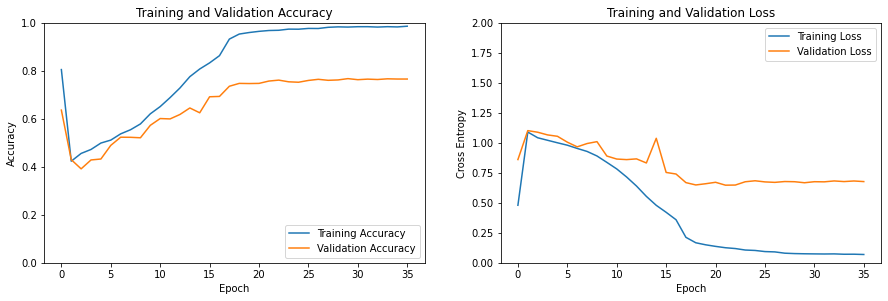

In [ ]:
plt.figure(figsize=(15, 15))

records     = pd.read_csv('resnetModel17.csv')
#Plotting the Accuracy:
plt.subplot(3, 2, 1)
plt.plot(records['acc'], label='Training Accuracy')
plt.plot(records['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')

#Plotting the Loss:
plt.subplot(3, 2, 2)
plt.plot(records['loss'], label='Training Loss')
plt.plot(records['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0.0,2])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

Model 17 -- Inferance Part

In [ ]:
def ResidualCNN(num_classes = 3):
  input = tf.keras.Input(shape=(200, 200, 3), name='img')
  #x = ZeroPadding2D((3,3))(inputs)

  #Beginning Conv Layer with MaxPool
  x = Conv2D(16, (3,3), padding='valid', strides=(2,2))(input)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  #x = MaxPooling2D(pool_size=(3,3), strides=(2,2))(x)

  x = resConv_blp(x,16)
  x = resIdentity_blk(x,16)
  x = resIdentity_blk(x,16)

  x = resConv_blp(x,32)
  x = resIdentity_blk(x,32)
  x = resIdentity_blk(x,32)

  x= AveragePooling2D(pool_size=(8,8))(x)
  x= Flatten()(x)

  output = Dense(num_classes, activation='softmax',kernel_initializer='he_normal')(x)
  model = Model(inputs = input,outputs = output)
  return model

In [ ]:
optmz       = optimizers.Adam(learning_rate=0.001)  #0.00001
modelPred = ResidualCNN()
modelPred.load_weights('/content/drive/MyDrive/MTech AI NUS/resnetModel17.h5')
modelPred.compile(loss='categorical_crossentropy', optimizer=optmz, metrics=['acc'])

In [ ]:
test_decoder = build_decoder(with_labels=False, target_size=(200, 200))

train_features = build_dataset(
    trainPath, bsize=BATCH_SIZE, repeat=False,
    shuffle=False, augment=False, cache=False,
    decode_fn=test_decoder
)

valid_features = build_dataset(
    validPath, bsize=BATCH_SIZE, repeat=False,
    shuffle=False, augment=False, cache=False,
    decode_fn=test_decoder
)
print(train_features, valid_features)
valid_predictions_baseline = modelPred.predict(valid_features, batch_size=16)
valid_baseline_results = modelPred.evaluate(dvalid,batch_size=16, verbose=0)
val_loss = round((valid_baseline_results[0]),5)
val_acc = round((valid_baseline_results[1]),5)
print('METRIC VALUES FOR VALID DATASET : \n')
print('LOSS : ', val_loss)
print('ACCURACY : ', val_acc)

<PrefetchDataset element_spec=TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None)> <PrefetchDataset element_spec=TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None)>
241/241 [==============================] - 16s 33ms/step
METRIC VALUES FOR VALID DATASET : 

LOSS :  0.66761
ACCURACY :  0.76793


In [ ]:
labelname   = ['non-recyclables',          # The label for reporting metrics
               'clean-recyclables',
               'dirty-recyclables']
                                                                                # Step 2
predout     = np.argmax(valid_predictions_baseline,axis=1)
testout     = np.argmax(validLabels,axis=1)

testScores  = metrics.accuracy_score(testout,predout)                           # Step 3

                                                                                # Step 4
print("Best accuracy (on testing dataset): %.2f%%" % (testScores*100))
print(metrics.classification_report(testout,
                                    predout,
                                    target_names=labelname,
                                    digits=4))

Best accuracy (on testing dataset): 76.79%
                   precision    recall  f1-score   support

  non-recyclables     0.7863    0.8156    0.8007      3145
clean-recyclables     0.7313    0.8450    0.7840      2664
dirty-recyclables     0.8064    0.5811    0.6754      1900

         accuracy                         0.7679      7709
        macro avg     0.7747    0.7472    0.7534      7709
     weighted avg     0.7723    0.7679    0.7641      7709



In [ ]:
confusion   = metrics.confusion_matrix(testout,predout)
print(confusion)

[[2451  407  287]
 [ 430 1981  253]
 [ 320  297 1283]]


Model 20

Model 20 --- 20 is the 3 residual blocks

Better at overfitting but worse in predicting dirty recyclables. Hence not used in final deployment.

In [ ]:
def ResidualCNN(num_classes = 3):
  input = tf.keras.Input(shape=(200, 200, 3), name='img')
  #x = ZeroPadding2D((3,3))(inputs)

  #Beginning Conv Layer with MaxPool
  x = Conv2D(16, (3,3), padding='valid', strides=(2,2))(input)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  #x = MaxPooling2D(pool_size=(3,3), strides=(2,2))(x)

  x = resConv_blp(x,16)
  x = resIdentity_blk(x,16)
  x = resIdentity_blk(x,16)

  x = resConv_blp(x,32)
  x = resIdentity_blk(x,32)
  x = resIdentity_blk(x,32)

  x = resConv_blp(x,32)
  x = resIdentity_blk(x,32)
  x = resIdentity_blk(x,32)

  x= AveragePooling2D(pool_size=(8,8))(x)
  x= Flatten()(x)

  output = Dense(num_classes, activation='softmax',kernel_initializer='he_normal')(x)
  model = Model(inputs = input,outputs = output)
  return model

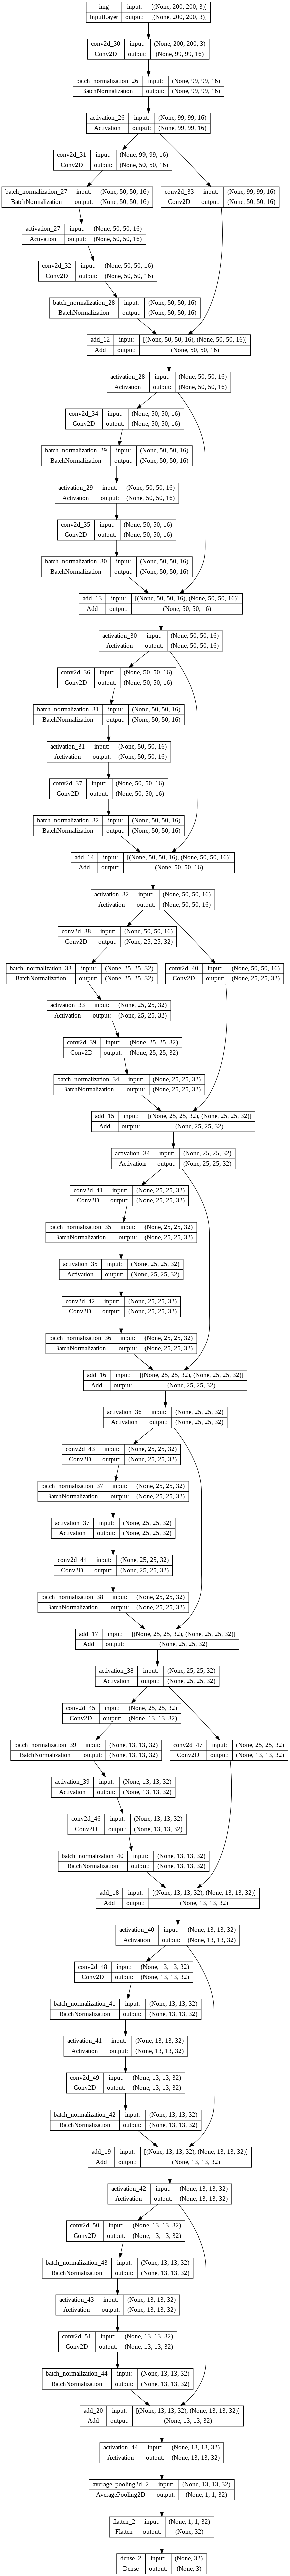

In [ ]:
model_t = ResidualCNN()
plot_model(model_t, 'mini_resnet_20.png', show_shapes=True)

In [ ]:
model_t = ResidualCNN()
model_t.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_149 (Conv2D)            (None, 99, 99, 16)   448         ['img[0][0]']                    
                                                                                                  
 batch_normalization_129 (Batch  (None, 99, 99, 16)  64          ['conv2d_149[0][0]']             
 Normalization)                                                                                   
                                                                                            

In [ ]:
history = model_t.fit(
    dtrain,
    epochs=50,
    verbose=1,
    callbacks=[checkpoint,LRScheduler,early_stop,csv_logger],
    steps_per_epoch=weighted_steps_per_epoch,
    validation_data=dvalid)

Learning rate:  0.001
Epoch 1/50
963/963 [==============================] - 28s 24ms/step - loss: 1.0940 - acc: 0.4159 - val_loss: 1.0589 - val_acc: 0.4554 - lr: 0.0010
Learning rate:  0.001
Epoch 2/50
963/963 [==============================] - 23s 24ms/step - loss: 1.0504 - acc: 0.4458 - val_loss: 1.0475 - val_acc: 0.4579 - lr: 0.0010
Learning rate:  0.001
Epoch 3/50
963/963 [==============================] - 23s 24ms/step - loss: 1.0345 - acc: 0.4680 - val_loss: 1.0199 - val_acc: 0.4819 - lr: 0.0010
Learning rate:  0.001
Epoch 4/50
963/963 [==============================] - 23s 24ms/step - loss: 1.0188 - acc: 0.4829 - val_loss: 1.0271 - val_acc: 0.4809 - lr: 0.0010
Learning rate:  0.001
Epoch 5/50
963/963 [==============================] - 23s 24ms/step - loss: 1.0035 - acc: 0.4950 - val_loss: 1.0121 - val_acc: 0.4885 - lr: 0.0010
Learning rate:  0.001
Epoch 6/50
963/963 [==============================] - 24s 25ms/step - loss: 0.9838 - acc: 0.5125 - val_loss: 1.0060 - val_acc: 0.4985

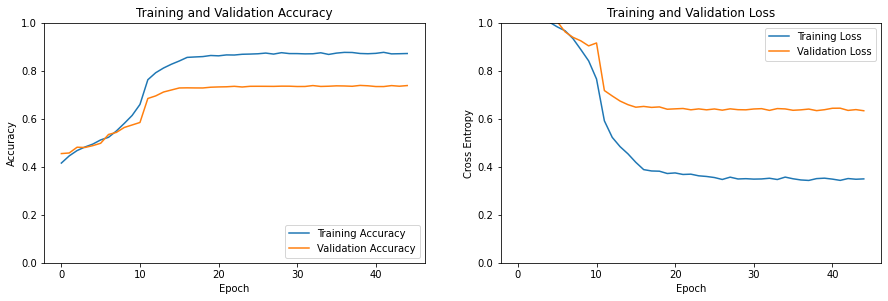

In [ ]:
plt.figure(figsize=(15, 15))

records     = pd.read_csv('resnetModel20.csv')
#Plotting the Accuracy:
plt.subplot(3, 2, 1)
plt.plot(records['acc'], label='Training Accuracy')
plt.plot(records['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')

#Plotting the Loss:
plt.subplot(3, 2, 2)
plt.plot(records['loss'], label='Training Loss')
plt.plot(records['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0.0,1])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
optmz       = optimizers.Adam(learning_rate=0.001)  #0.00001
modelPred = ResidualCNN()
modelPred.load_weights('/content/drive/MyDrive/MTech AI NUS/PRACTICE MODULE/resnetModel20.h5')
modelPred.compile(loss='categorical_crossentropy', optimizer=optmz, metrics=['acc'])

In [ ]:
test_decoder = build_decoder(with_labels=False, target_size=(200, 200))

train_features = build_dataset(
    trainPath, bsize=BATCH_SIZE, repeat=False,
    shuffle=False, augment=False, cache=False,
    decode_fn=test_decoder
)

valid_features = build_dataset(
    validPath, bsize=BATCH_SIZE, repeat=False,
    shuffle=False, augment=False, cache=False,
    decode_fn=test_decoder
)
print(train_features, valid_features)
valid_predictions_baseline = modelPred.predict(valid_features, batch_size=16)
valid_baseline_results = modelPred.evaluate(dvalid,batch_size=16, verbose=0)
val_loss = round((valid_baseline_results[0]),5)
val_acc = round((valid_baseline_results[1]),5)
print('METRIC VALUES FOR VALID DATASET : \n')
print('LOSS : ', val_loss)
print('ACCURACY : ', val_acc)

<PrefetchDataset element_spec=TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None)> <PrefetchDataset element_spec=TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None)>
241/241 [==============================] - 9s 37ms/step
METRIC VALUES FOR VALID DATASET : 

LOSS :  0.6345
ACCURACY :  0.73965


In [ ]:
labelname   = ['non-recyclables',          # The label for reporting metrics
               'clean-recyclables',
               'dirty-recyclables']
                                                                                # Step 2
predout     = np.argmax(valid_predictions_baseline,axis=1)
testout     = np.argmax(validLabels,axis=1)

testScores  = metrics.accuracy_score(testout,predout)                           # Step 3

                                                                                # Step 4
print("Best accuracy (on validation dataset): %.2f%%" % (testScores*100))
print(metrics.classification_report(testout,
                                    predout,
                                    target_names=labelname,
                                    digits=4))

Best accuracy (on validation dataset): 73.97%
                   precision    recall  f1-score   support

  non-recyclables     0.7555    0.7800    0.7675      3145
clean-recyclables     0.7001    0.8131    0.7523      2664
dirty-recyclables     0.7917    0.5700    0.6628      1900

         accuracy                         0.7397      7709
        macro avg     0.7491    0.7210    0.7276      7709
     weighted avg     0.7452    0.7397    0.7365      7709



In [ ]:
confusion   = metrics.confusion_matrix(testout,predout)
print(confusion)

[[2453  528  164]
 [ 377 2166  121]
 [ 417  400 1083]]
